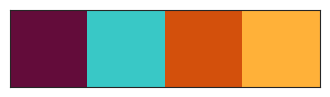

In [1]:
import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
#set style of plots
sns.set_style('white')
#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)
# Ignore useless warnings (see SciPy issue #5998)



In [2]:
path='data_moods.csv'

In [3]:
data=pd.read_csv('data_moods.csv')

In [4]:
data.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,She makes me so unsure,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,27-10-1982,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,Twenty-three seconds,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,16-04-2007,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,06-11-2006,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,21-08-1984,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,01-01-2004,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [5]:
data.describe()

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,41.534207,221739.868996,0.500405,0.450221,0.506985,0.350062,0.166786,0.342239,-11.554170,0.053926,119.163856,5.327511,3.870451
std,23.028913,63367.276400,0.158886,0.410616,0.326780,0.410389,0.142040,0.252174,7.487809,0.041347,28.967652,3.554103,0.499956
min,0.000000,76773.000000,0.078900,0.000005,0.001290,0.000000,0.031800,0.035300,-42.018000,0.023200,50.960000,0.000000,1.000000
25%,30.000000,179243.000000,0.388000,0.014850,0.202000,0.000034,0.092500,0.131500,-15.883000,0.033200,99.009500,2.000000,4.000000
50%,47.000000,213173.000000,0.504000,0.362000,0.495000,0.026900,0.111000,0.281000,-9.373000,0.040700,120.109000,6.000000,4.000000
75%,57.000000,254526.500000,0.612000,0.905500,0.844000,0.857500,0.173500,0.508500,-5.638000,0.057350,132.968500,9.000000,4.000000
max,88.000000,518373.000000,0.941000,0.996000,0.994000,0.966000,0.963000,0.977000,1.342000,0.416000,217.950000,11.000000,5.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              687 non-null    object 
 1   album             687 non-null    object 
 2   artist            687 non-null    object 
 3   id                687 non-null    object 
 4   release_date      687 non-null    object 
 5   popularity        687 non-null    int64  
 6   length            687 non-null    int64  
 7   danceability      687 non-null    float64
 8   acousticness      687 non-null    float64
 9   energy            687 non-null    float64
 10  instrumentalness  687 non-null    float64
 11  liveness          687 non-null    float64
 12  valence           687 non-null    float64
 13  loudness          687 non-null    float64
 14  speechiness       687 non-null    float64
 15  tempo             687 non-null    float64
 16  key               687 non-null    int64  
 1

In [7]:
s=data.groupby("artist")["popularity"].sum().sort_values(ascending=False).head(170652)

In [8]:
s.head(10)

artist
Various Artists        305
Prince                 265
Billie Eilish          257
Linkin Park            240
My Chemical Romance    238
Wilson Trouvé          183
Lewis Capaldi          169
Blasterjaxx            167
The Beatles            157
Monocle Twins          156
Name: popularity, dtype: int64

<AxesSubplot:>

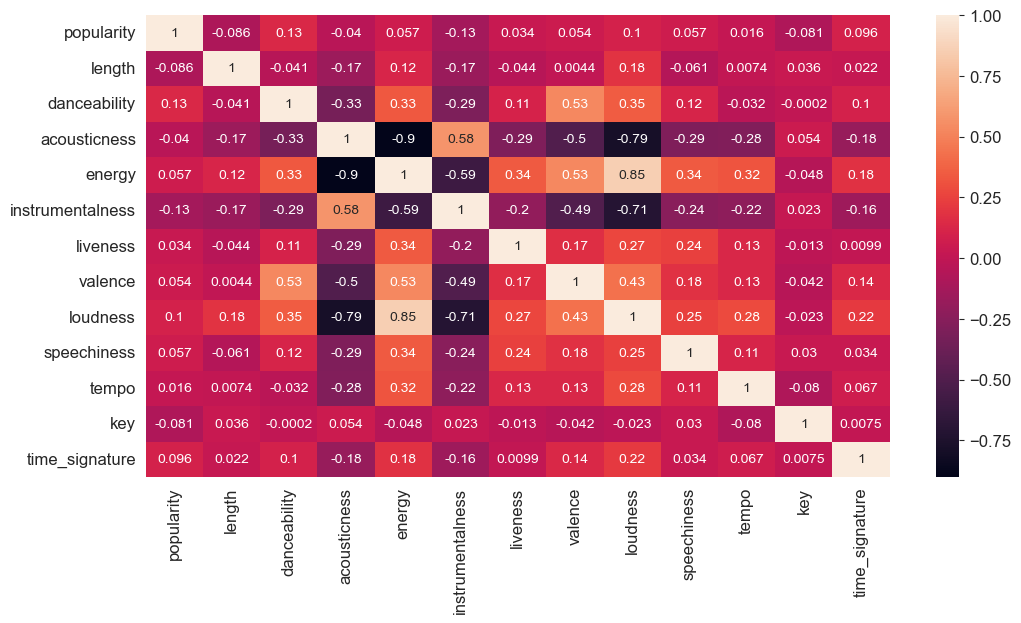

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

<Figure size 1600x800 with 0 Axes>

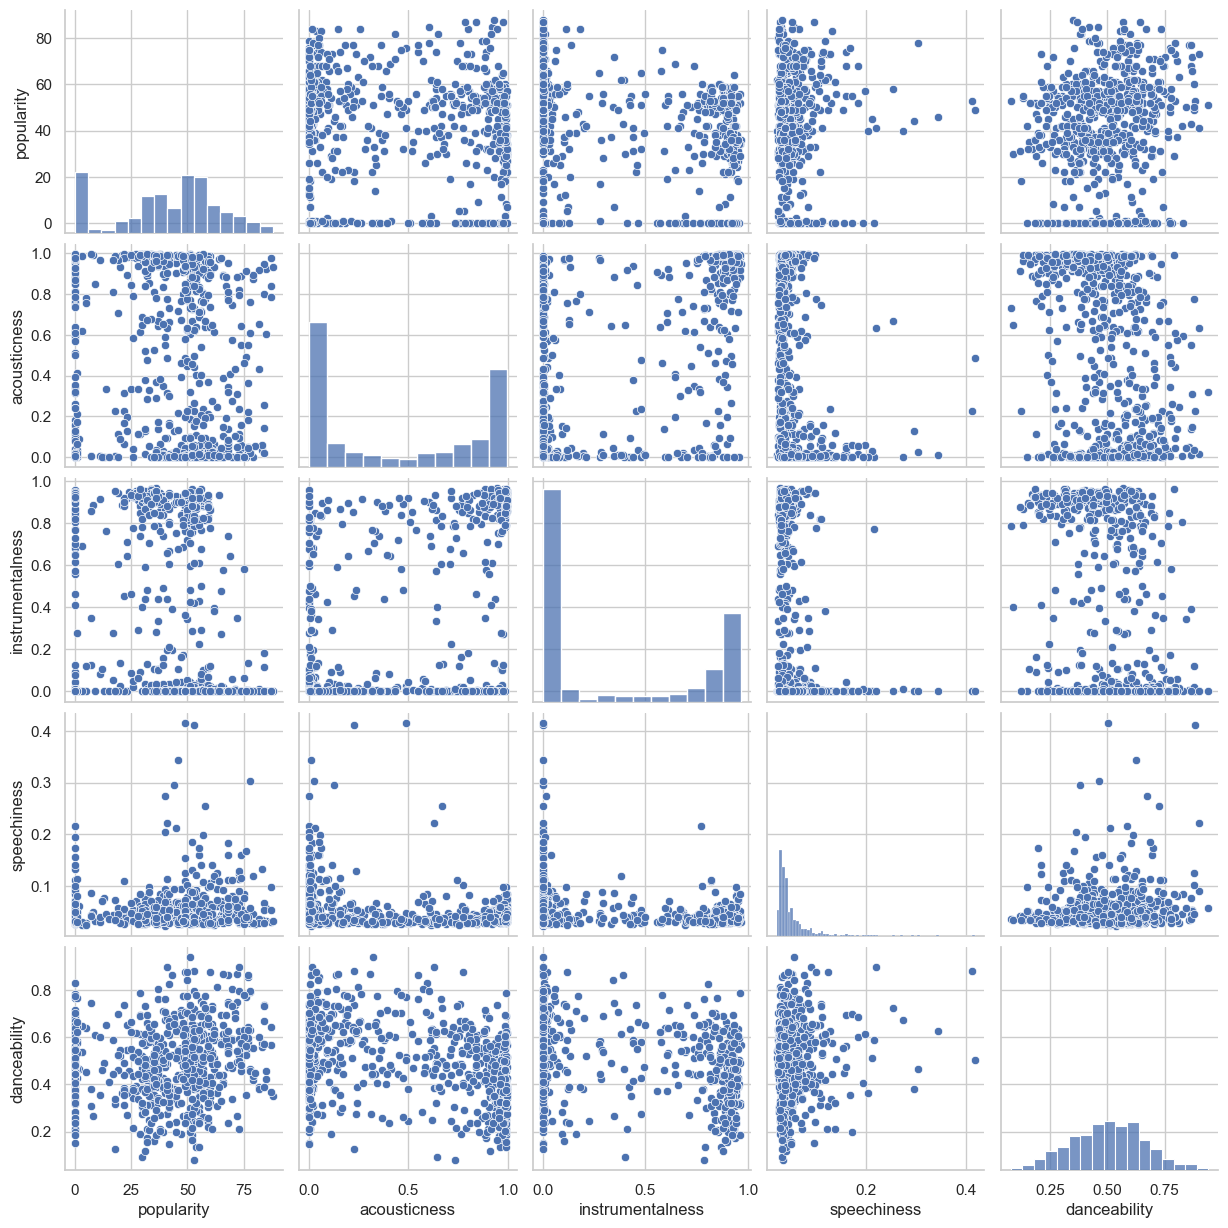

In [10]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(data[cols], height = 2.5 )
plt.show();

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              687 non-null    object 
 1   album             687 non-null    object 
 2   artist            687 non-null    object 
 3   id                687 non-null    object 
 4   release_date      687 non-null    object 
 5   popularity        687 non-null    int64  
 6   length            687 non-null    int64  
 7   danceability      687 non-null    float64
 8   acousticness      687 non-null    float64
 9   energy            687 non-null    float64
 10  instrumentalness  687 non-null    float64
 11  liveness          687 non-null    float64
 12  valence           687 non-null    float64
 13  loudness          687 non-null    float64
 14  speechiness       687 non-null    float64
 15  tempo             687 non-null    float64
 16  key               687 non-null    int64  
 1

# FEATURE SELECTION

In [12]:
features = data[['danceability','liveness','acousticness','loudness','speechiness','valence','energy']]

# DATA PREPROCESSING

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'energy'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

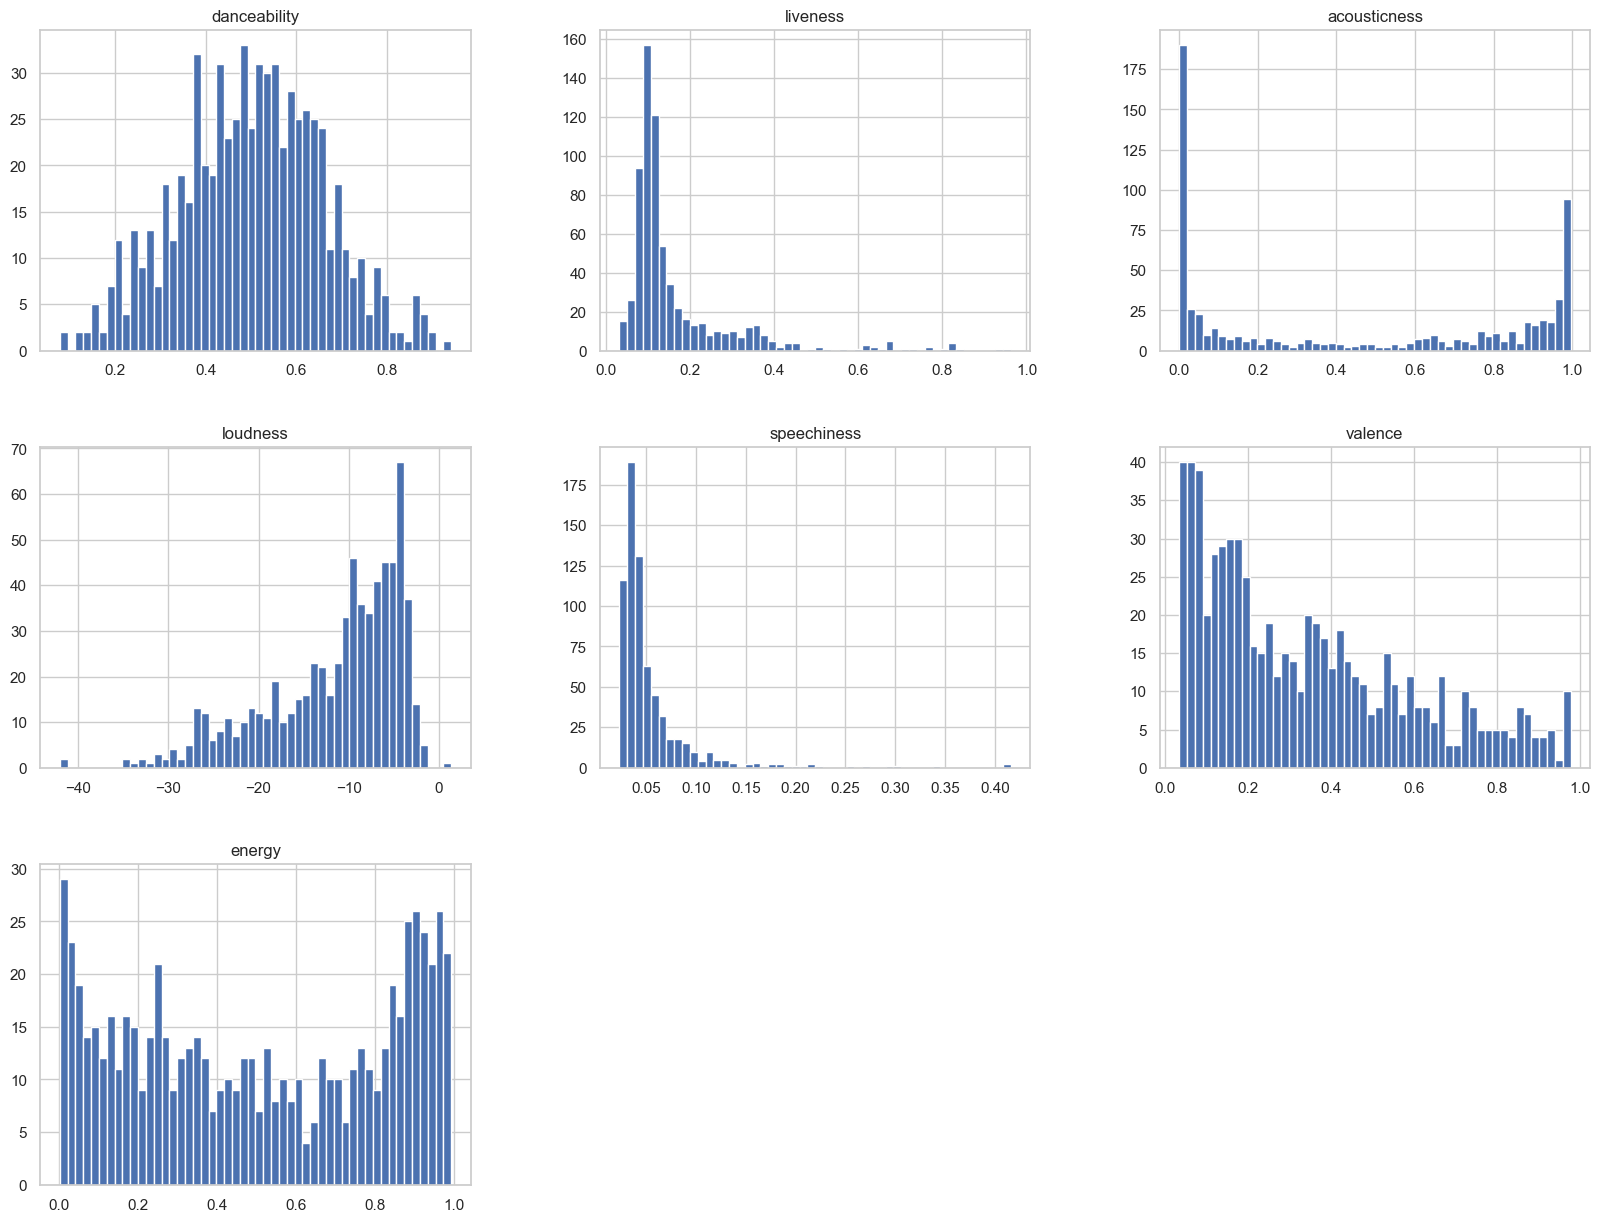

In [13]:
from sklearn import preprocessing

loudness = features[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
data['loudness'] = pd.DataFrame(loudness_scaled)




features.hist(bins=50,figsize=(20,15))